## Equations for Moment Closure of Network-based micro-model for divestment of bounded rational households.

Imports and setup

In [1]:
import sympy as s
import pickle as pkl
from sympy.abc import epsilon, phi, tau
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
s.init_printing()

Define variables and parameters for the adaptive voter model

In [2]:
# number of nodes
N = s.Symbol('N', integer=True)
# number of dirty nodes
Nd = s.Symbol('N_d', integer=True)
# number of clean nodes
Nc = s.Symbol('N_c', integer=True)
# number of edges
K = s.Symbol('K', integer=True)
# number of clean edges
cc = s.Symbol('[cc]', integer=True)
# number of dirty edges
dd = s.Symbol('[dd]', integer=True)
# number of mixed edges
cd = s.Symbol('[cd]', integer=True)
# average number of neighbors of clean nodes
kc = s.Symbol('k_c', integer=True)
# average number of neighbors of dirty nodes
kd = s.Symbol('k_d', integer=True)
# Nc - Nd
X = s.Symbol('X', real=True)
# cc - dd
Y = s.Symbol('Y', real=True)
# cd
Z = s.Symbol('Z', real=True, positive=True)
# income of dirty household
Fd = s.Symbol('F_d', real=True, positive=True)
# income of clean household
Fc = s.Symbol('F_c', real=True, positive=True)
# imitation probabilities
Pcd, Pdc = s.symbols('Pcd Pdc')

Define variables and parameters for the economic subsystem:

In [3]:
# Total labor and labor shares
P, Pc, Pd = s.symbols('P P_c P_d', positive=True, real=True)
# Total clean and dirty capital
Kc, Kd = s.symbols('K_c K_d', positive=True, real=True)
# wages and return rates on clean and dirty capital
w, rc, rd = s.symbols('w r_c r_d', positive=True, real=True)
# resource use (R), remaining resource stock (G) and knowledge stock (C)
R, G, C = s.symbols('R, G, C', positive=True, real=True)
# endowments of clean and dirty households in clean and dirty capital.
# First (lower) index denotes capital type, second (upper) index denotes household type
Kcc, Kcd, Kdc, Kdd = s.symbols('K_c^{(c)} K_c^{(d)} K_d^{(c)} K_d^{(d)}', positive=True, real=True)
# savings rate (rs), capital depreciation rate (delta), and elasticities for labor (pi), capital (kappac, kappad) and knowledge (xi)
rs, delta, pi, kappac, kappad, xi = s.symbols('s delta pi kappa_c, kappa_d xi', positive=True, rational=True, real=True)
# total factor productivity of sectors (bc, bd), initial resource extraction cost (bR), resource conversion efficiency (e) and initial resource stock (G0)
bc, bd, bR, e, G0 = s.symbols('b_c b_d b_R e G_0', positive=True, real=True)
# substitution symbols
Xc, Xd, XR = s.symbols('X_c X_d X_R', positive=True, real=True)


Defination of relations between variables and calculation of substitution of *primitive variables* by *state variables* of the system

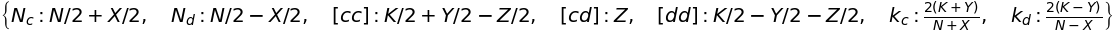

In [4]:
eqs = [
    # total number of nodes N and edges K is constant
    Nd+Nc-N,
    cc+dd+cd-K,
    # definition of variables for social system (X, Y, Z)
    X-Nc+Nd,
    Y-cc+dd,
    Z-cd,
    # definition of mean degree of clean and dirty households (kc, kd)
    kc-(2*cc+cd)/Nc,
    kd-(2*dd+cd)/Nd
]
vars1 = (Nc, Nd, cc, dd, cd, kc, kd)
vars2 = (N, K, X, Y, Z)
subs1 = s.solve(eqs, vars1, dict=True)[0]

subs1

Effect of events on state vector S = (X, Y, Z)

In [5]:
# regular adaptive voter events
s1 = s.Matrix([ 0, 1, -1]) # clean investor rewires
s2 = s.Matrix([ 0,-1, -1]) # dirty investor rewires
s3 = s.Matrix([-2,-kc,-1 + (1-1./kc)*((2*cc-cd)/Nc)]) # clean investor imitates c -> d
s4 = s.Matrix([ 2, kd,-1 + (1-1./kd)*((2*dd-cd)/Nd)]) # dirty investor imitates d -> c

# noise events

s5 = s.Matrix([-2,-(2*cc+cd)/Nc,(2*cc-cd)/Nc]) # c -> d
s6 = s.Matrix([ 2, (2*dd+cd)/Nd,(2*dd-cd)/Nd]) # d -> c
s7 = s.Matrix([ 0,-1, 1]) # c-c -> c-d
s8 = s.Matrix([ 0, 1,-1]) # c-d -> c-c
s9 = s.Matrix([ 0, 1, 1]) # d-d -> d-c
s10= s.Matrix([ 0,-1,-1]) # d-c -> d-d

Probabilities for events to occur:

In [6]:
p1 = (1-epsilon)*(Nc/N)*cd/(Nc * kc)*phi # clean investor rewires
p2 = (1-epsilon)*(Nd/N)*cd/(Nd * kd)*phi # dirty investor rewires
p3 = (1-epsilon)*(Nc/N)*cd/(Nc * kc)*(1-phi)* Pcd # clean investor imitates c -> d
p4 = (1-epsilon)*(Nd/N)*cd/(Nd * kd)*(1-phi)* Pdc # dirty investor imitates d -> c
p5 = epsilon * (1 - phi) * (1./2) * Nc/N # c -> d
p6 = epsilon * (1 - phi) * (1./2) * Nd/N # d -> c
p7 = epsilon * phi * Nc/N * (2*cc)/(2*cc+cd) * Nd/N # c-c -> c-d
p8 = epsilon * phi * Nc/N * (cd)/(2*cc+cd) * Nc/N   # c-d -> c-c
p9 = epsilon * phi * Nd/N * (2*dd)/(2*dd+cd) * Nc/N # d-d -> d-c
p10= epsilon * phi * Nd/N * (cd)/(2*dd+cd) * Nd/N   # d-c -> d-d

State space jumps are combined in a matrix $\mathbf{S}$:

In [7]:
S = s.Matrix(s1)
for i, si in enumerate([s2, s3, s4, s5, s6, s7, s8, s9, s10]):
    S = S.col_insert(i+1, si)

Rates for events are given by the total rate of events N/tau times the probability for the individual events. These are combined in the rate vector $\vec{r}$

In [8]:
r = s.Matrix([p1])
for j, pj in enumerate([s.Matrix([p]) for p in[p2, p3, p4, p5, p6, p7, p8, p9, p10]]):
    r = r.col_insert(j+1, pj)
r = N / tau * r

The right hand side of the transition matrix of the markov process for the pair based proxy description of the adaptive voter model is given by the product of $\vec{r}$ and $\mathbf{S}$

In [9]:
rhsPBP = S*s.Transpose(r)

We substitute the naive variables (Nc, Nd, cc, cd, dd) with system state variables (X, Y, Z):

In [10]:
rhsPBP = rhsPBP.subs(subs1)

Show resulting dynamic equations for PBP

In [11]:
rhsPBP

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                    Pcd⋅Z⋅(-ε + 1)⋅(-φ + 1)  
⎢                                                  - ─────────────────────── +
⎢                                                               τ             
⎢                                                   

To prepar for the $N \rightarrow \infty$ limit, we substitute the system variables $(X, Y, Z)$ with their rescalled equivalents $(x, y, z)$ and express total clean and dirty capital $(K_c, K_d)$ as the summ of the endowments of clean and dirty households $(K_c^{(c)}, K_c^{(d)}, K_d^{(c)}, K_d^{(d)})$.

In [12]:
x, y, z, k = s.symbols('x y z k')
subs4 = {Kc: Kcc + Kcd,
         Kd: Kdc + Kdd,
         X: N*x,
         Y: N*k*y,
         Z: N*k*z,
         K: N*k}

We substitutute solutions to algebraic constraints of economic system (market clearing for labor and expressions for capital rent and resource flow)

In [13]:
subs3 = {Xc: (bc*Kc**kappac * C**xi)**(1./(1-pi)),
         Xd: (bd*Kd**kappad)**(1./(1-pi)),
         XR: (1.-bR/e*(G0/G)**2)**(1./(1-pi))}

In [14]:
subs2 = {w: pi * P**(pi-1) * (Xc + Xd*XR)**(1-pi),
        rc: kappac/Kc*Xc*P**pi*(Xc + Xd*XR)**(-pi),
        rd: kappad/Kd*Xd*XR*P**pi*(Xc + Xd*XR)**(-pi),
        R:  bd/e*Kd**kappad*P**pi*(Xd*XR/(Xc + Xd*XR))**pi,
        Pc: P*Xc/(Xc + Xd*XR),
        Pd: P*Xd*XR/(Xc + Xd*XR)}

and write down the dynamic equations for the economic subsystem in terms of aggregates of clean and dirty capital stocks for clean and dirty households.

Below is the right hand side for $(\dot{K}_c^{(c)}, \dot{K}_c^{(d)}, \dot{K}_d^{(c)}, \dot{K}_d^{(d)}, \dot{C}, \dot{G})$ as resulting from economic dynamics only.

In [15]:
rhsECO = s.Matrix([(rs*rc-delta)*Kcc + rs*rd*Kcd + rs*w*P*Nc/N,
                  -delta*Kcd,
                  -delta*Kdc,
                  rs*rc*Kdc + (rs*rd-delta)*Kdd + rs*w*P*Nd/N,
                  bc*Pc**pi*Kc**kappac * C**xi - delta*C,
                  -R])


In addition to to the changes from capital accumulation, the aggregate capital endowments of clean and dirty households in both sectors $(K_c^{(c)}, K_c^{(d)}, K_d^{(c)}, K_d^{(d)})$, are changed by households changing their opinion and taking their capital with them. This, we appriximate by rate equations assuming each household changing her oppinion owns the average of its cohorts capital.

In [16]:
# rate of households changing their opinion from c -> d
dtNcd = N/tau * (p3 + p5)
# rate of households changing their opinion from d -> c
dtNdc = N/tau * (p4 + p6)

# the changes are given by the summ of the outflux due to households changing TO another oppinion 
# and the influx of households changing FROM another opinion

rhsECO_switch = s.Matrix([
            # change of clean capital owned by clean investors
            Kcd / Nd * dtNdc - Kcc / Nc * dtNcd,
            # change of clean capital owned by dirty investors
            Kcc / Nc * dtNcd - Kcd / Nd * dtNdc,
            # change in dirty capital owned by clean investors
            Kdd / Nd * dtNdc - Kdc / Nc * dtNcd,
            # change in dirty capital owned by dirty investors
            Kdc / Nc * dtNcd - Kdd / Nd * dtNdc,
            0,
            0])
rhsECO_switch = rhsECO_switch.subs(subs1)
rhsECO = rhsECO + rhsECO_switch

Finally, we have to approximate the imitation probabilities $(P_{c \rightarrow d}, P_{d \rightarrow c})$ between two individual households of different opinions by their expected values, e.g. the probability of the average clean household to imitate the average dirty household and vice versa.

In [17]:
# definition of symbold
full_Pcd = s.Symbol('fP_{cd}')
full_Pdc = s.Symbol('fP_{dc}')
a = s.Symbol('a', real=True, positive=True)

# imitation probabilities depending on relative differences in income (fitness) along the lines of (Traulsen 2010)
full_Pcd = 1/(1-s.exp(-a*(Fd-Fc)/(Fc+Fd)))
full_Pdc = 1/(1-s.exp(-a*(Fc-Fd)/(Fc+Fd)))

We do this by means of a taylor expansion of the imitation probabilities $(P_{c \rightarrow d}, P_{d \rightarrow c})$ up to linear order in terms of the clean and dirty household incomes $(F_c, F_d)$ around the point $(F_c^0, F_d^0)$ that is yet to be defined.

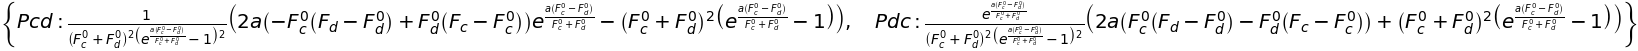

In [18]:
# Point of reference for series expansion:
Fc0, Fd0 = s.symbols('F_c^0 F_d^0')
sbs0 = ({Fc: Fc0, Fd: Fd0})

# Series expansion of imitation probabilities to first order in clean and dirty household income:
subsP = {Pcd: s.simplify(full_Pcd.subs(sbs0) + s.diff(full_Pcd, Fc).subs(sbs0)*(Fc - Fc0) + s.diff(full_Pcd, Fd).subs(sbs0)*(Fd - Fd0)),
         Pdc: s.simplify(full_Pdc.subs(sbs0) + s.diff(full_Pdc, Fc).subs(sbs0)*(Fc - Fc0) + s.diff(full_Pdc, Fd).subs(sbs0)*(Fd - Fd0))
        }
subsP

The criterion for the point of reference of the expansion is that it should make the approximation good in the biggest part of the state space of the model. We therefore chose $(F_c^0, F_d^0)$ to be in the middle of their extreme values.

The lower bound for $(F_c^0, F_d^0)$ is zero.

As an upper bound for $(F_c^0, F_d^0)$ we take their value in an exclusively clean resp. exclusively dirty economy with abundand fossil resources $(G == G_0)$

### First, the case of an exclusively dirty economy 
e.g. the case in which all households invest in the dirty sector:

Production function is given by

$Y_d = min(b_d K_d^{\kappa_d} P^{\pi}, e R)$,

economic output is given by production minus cost for resource extraction $Y_d - c_R$ where cost for resource extraction is assumed to be

$ c_R = b_R R \left( \frac{G}{G_0} \right)^2 $.

Capital accumulation is described by

$ \dot{K}_d = s I - \delta K_d, \quad I = r_d K_d + w P$

and capital return rate and wages are given by marginal increase of economic output for their respective input factors:

$ r_d = \frac{\partial}{\partial K_d} (Y_d - c_R), \quad w = \frac{\partial}{\partial P} (Y_d - c_R) $

So the equilibrium dirty capital stock is given by the root of the following expression:

$ 0 = s \left(1 - \frac{b_R}{e} \right) \left( K_d \frac{\partial Y_d}{\partial K_d} + P \frac{\partial Y_d}{\partial P} \right) - \delta K_d = s \left(1 - \frac{b_R}{e} \right) (\kappa_d + \pi) b_d K_d^{\kappa_d} P^{\pi} - \delta K_d $

which is, given $\kappa_d + \pi = 1$:

$ K_d^* = \left( \frac{s b_d P^\pi}{\delta} \left(1 - \frac{b_R}{e} \right)\right)^{\left(\frac{1}{1 - \kappa_d} \right)}, 0$

of which we consider the first.

### Second, the case of an exclusively clean economy:
e.g. the case where all households invest in the clean sector.

Production is given by 

$ Y_c = b_c K_c^{\kappa_c} P^{\pi} C^{\xi} $

and capital and knowledge accumulation are given by:

$ \dot{K}_c = s I - \delta K_d, \quad I = r_c K_c + w P $

$ \dot{C} = Y_d - \delta C $

with $\kappa_c + \pi = 1$ and capital return rate and wages equal to marginal factor returns, this is equivalent to

$ \dot{K}_c = s b_c K_c^{\kappa_c} P^{\pi} C^{\xi} - \delta K_d,$

$ \dot{C} = b_c K_c^{\kappa_c} P^{\pi} C^{\xi} - \delta C $,

whose stationary points except for $(0, 0)$ is

$ K_c^*, C^* = s \left( \frac{s^{\kappa_c} b_c}{\delta} P^\pi \right)^{\frac{\xi - 1}{\kappa_c(1-\xi)-1}}, \left( \frac{s^{\kappa_c} b_c}{\delta} P^\pi \right)^{\frac{1}{\kappa_c(1-\xi)-1}} $

In the economic system, substitute: 
1)primitive variables for dependent variables (subs2)
2)dependent variables for system variables (subs3)

In [19]:
rhsECO = rhsECO.subs(subs1).subs(subs2).subs(subs3).subs(subs4)

In the PBP rhs substitute:
dependent variables for system variables

In [20]:
rhsPBP = rhsPBP.subs(subs1).subs(subs2).subs(subs3).subs(subs4)

Combine dynamic equations of economic and social subsystem:

In [21]:
rhs = s.Matrix([rhsPBP,rhsECO]).subs(subs1)